In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('final.csv')

# Ensure all entries in 'tweet' column are strings and handle NaNs
df['tweet'] = df['tweet'].astype(str).fillna('')

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the tweets to TF-IDF features
X = vectorizer.fit_transform(df['tweet']).toarray()

# Assuming the target variable is named 'class' and is already cleaned
y = df['class'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  

# Compile the model with adjusted class weights
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')

# Detailed classification report
print(classification_report(y_test, y_pred_classes, target_names=['Normal', 'Offensive', 'Hate']))


C:\Users\chish\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,259 (1.22 MB)

 Trainable params: 320,259 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 91s 14ms/step - accuracy: 0.7021 - loss: 0.7533 - val_accuracy: 0.9460 - val_loss: 0.3977
Epoch 2/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9032 - loss: 0.3014 - val_accuracy: 0.9221 - val_loss: 0.2971
Epoch 3/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9308 - loss: 0.2184 - val_accuracy: 0.9215 - val_loss: 0.2326
Epoch 4/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9485 - loss: 0.1735 - val_accuracy: 0.9468 - val_loss: 0.1764
Epoch 5/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9587 - loss: 0.1387 - val_accuracy: 0.9541 - val_loss: 0.1512
Epoch 6/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9663 - loss: 0.1157 - val_accuracy: 0.9411 - val_loss: 0.1505
Epoch 7/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9724 - loss: 0.1008 - val_accuracy: 0.9629 - val_loss: 0.1137
Epoch 8/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9760 - loss: 0.0848 

# Performing Logistic Regression, Random Forest, Support Vector Machine

Logistic Regression:
Accuracy: 0.8349808351825702
Precision: 0.8858932371831812
Recall: 0.8349808351825702
F1-Score: 0.853506068591439
              precision    recall  f1-score   support

      Normal       0.26      0.53      0.34       290
   Offensive       0.96      0.84      0.90      3832
        Hate       0.75      0.90      0.82       835

    accuracy                           0.83      4957
   macro avg       0.66      0.76      0.69      4957
weighted avg       0.89      0.83      0.85      4957



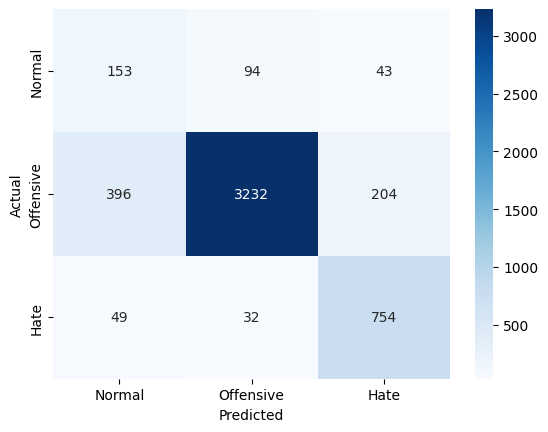

Random Forest:
Accuracy: 0.8712931208392173
Precision: 0.8774346349987299
Recall: 0.8712931208392173
F1-Score: 0.8738387011166835
              precision    recall  f1-score   support

      Normal       0.34      0.37      0.35       290
   Offensive       0.94      0.91      0.92      3832
        Hate       0.78      0.86      0.82       835

    accuracy                           0.87      4957
   macro avg       0.69      0.72      0.70      4957
weighted avg       0.88      0.87      0.87      4957



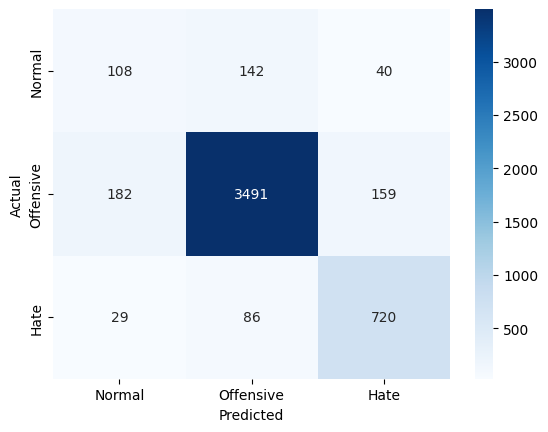

Support Vector Machine:
Accuracy: 0.8297357272543877
Precision: 0.8887702596974465
Recall: 0.8297357272543877
F1-Score: 0.8518667641625789
              precision    recall  f1-score   support

      Normal       0.23      0.54      0.33       290
   Offensive       0.96      0.84      0.89      3832
        Hate       0.78      0.90      0.84       835

    accuracy                           0.83      4957
   macro avg       0.66      0.76      0.69      4957
weighted avg       0.89      0.83      0.85      4957



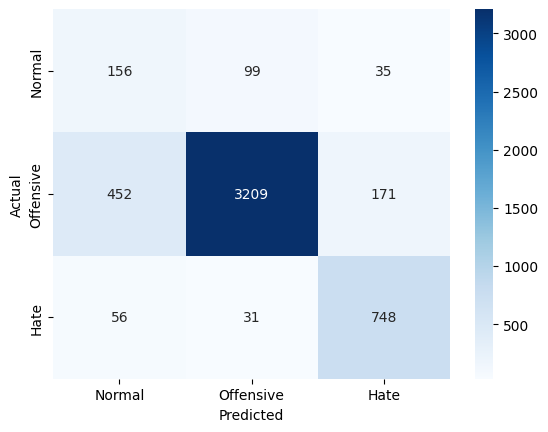

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final.csv')

# Ensure all entries in 'tweet' column are strings and handle NaNs
df['tweet'] = df['tweet'].astype(str).fillna('')

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the tweets to TF-IDF features
X = vectorizer.fit_transform(df['tweet']).toarray()

# Assuming the target variable is named 'class' and is already cleaned
y = df['class'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Offensive', 'Hate']))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Offensive', 'Hate'], yticklabels=['Normal', 'Offensive', 'Hate'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
print("Logistic Regression:")
train_and_evaluate(log_reg, X_train_resampled, y_train_resampled, X_test, y_test)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100)
print("Random Forest:")
train_and_evaluate(rf_clf, X_train_resampled, y_train_resampled, X_test, y_test)

# Support Vector Machine
svm_clf = SVC(kernel='linear', probability=True)
print("Support Vector Machine:")
train_and_evaluate(svm_clf, X_train_resampled, y_train_resampled, X_test, y_test)


# Performing Sequential Model

C:\Users\chish\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 93s 45ms/step - accuracy: 0.6891 - loss: 0.7573 - val_accuracy: 0.9028 - val_loss: 0.4853
Epoch 2/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8979 - loss: 0.3122 - val_accuracy: 0.9653 - val_loss: 0.2774
Epoch 3/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9274 - loss: 0.2294 - val_accuracy: 0.9720 - val_loss: 0.2062
Epoch 4/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9447 - loss: 0.1820 - val_accuracy: 0.9365 - val_loss: 0.2002
Epoch 5/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 0.9551 - loss: 0.1519 - val_accuracy: 0.9646 - val_loss: 0.1491
Epoch 6/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 0.9605 - loss: 0.1313 - val_accuracy: 0.9698 - val_loss: 0.1310
Epoch 7/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.9676 - loss: 0.1132 - val_accuracy: 0.9563 - val_loss: 0.1246
Epoch 8/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9734 -

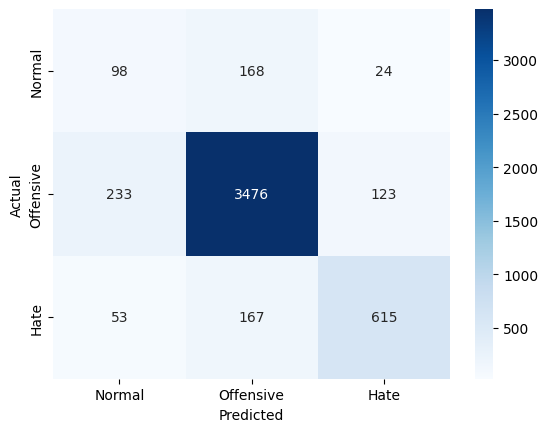

In [4]:
# Define the deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Evaluate the deep learning model
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(classification_report(y_test, y_pred_classes, target_names=['Normal', 'Offensive', 'Hate']))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Offensive', 'Hate'], yticklabels=['Normal', 'Offensive', 'Hate'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Performing Convolutional Neural Networks (CNNs)

Epoch 1/10


C:\Users\chish\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1152/1152 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.6426 - loss: 0.7910 - val_accuracy: 0.1468 - val_loss: 1.8185
Epoch 2/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.8087 - loss: 0.4981 - val_accuracy: 0.3141 - val_loss: 1.3683
Epoch 3/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.8856 - loss: 0.3206 - val_accuracy: 0.3219 - val_loss: 1.8828
Epoch 4/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.9367 - loss: 0.1881 - val_accuracy: 0.3173 - val_loss: 2.2678
Epoch 5/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.9576 - loss: 0.1258 - val_accuracy: 0.3126 - val_loss: 3.0204
Epoch 6/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.9714 - loss: 0.0891 - val_accuracy: 0.3257 - val_loss: 3.6606
Epoch 7/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.9767 - loss: 0.0705 - val_accuracy: 0.3322 - val_loss: 4.0262
Epoch 8/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.9808 - loss: 0.05

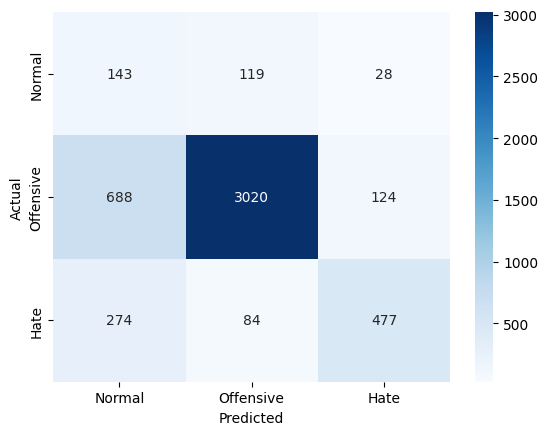

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['tweet'])
X_seq = tokenizer.texts_to_sequences(df['tweet'])
X_pad = pad_sequences(X_seq, maxlen=100)

X_train_pad, X_test_pad, y_train_pad, y_test_pad = train_test_split(X_pad, y, test_size=0.2, random_state=42)
X_train_pad_resampled, y_train_pad_resampled = smote.fit_resample(X_train_pad, y_train_pad)

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(3, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer=Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train_pad_resampled, y_train_pad_resampled, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the test set
cnn_y_pred = cnn_model.predict(X_test_pad)
cnn_y_pred_classes = cnn_y_pred.argmax(axis=1)

# Evaluate the CNN model
cnn_accuracy = accuracy_score(y_test_pad, cnn_y_pred_classes)
cnn_precision = precision_score(y_test_pad, cnn_y_pred_classes, average='weighted')
cnn_recall = recall_score(y_test_pad, cnn_y_pred_classes, average='weighted')
cnn_f1 = f1_score(y_test_pad, cnn_y_pred_classes, average='weighted')
print(f'CNN Accuracy: {cnn_accuracy}')
print(f'CNN Precision: {cnn_precision}')
print(f'CNN Recall: {cnn_recall}')
print(f'CNN F1-Score: {cnn_f1}')
print(classification_report(y_test_pad, cnn_y_pred_classes, target_names=['Normal', 'Offensive', 'Hate']))
cnn_cm = confusion_matrix(y_test_pad, cnn_y_pred_classes)
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Offensive', 'Hate'], yticklabels=['Normal', 'Offensive', 'Hate'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# performing LSTM (Long Short-Term Memory)

C:\Users\chish\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 154s 115ms/step - accuracy: 0.6112 - loss: 0.8234 - val_accuracy: 0.2887 - val_loss: 1.3868
Epoch 2/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 153s 133ms/step - accuracy: 0.7696 - loss: 0.5809 - val_accuracy: 0.2209 - val_loss: 1.5478
Epoch 3/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 159s 138ms/step - accuracy: 0.8184 - loss: 0.4758 - val_accuracy: 0.2483 - val_loss: 1.8353
Epoch 4/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 157s 136ms/step - accuracy: 0.8585 - loss: 0.3820 - val_accuracy: 0.2775 - val_loss: 1.9423
Epoch 5/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 400s 347ms/step - accuracy: 0.8856 - loss: 0.3048 - val_accuracy: 0.2899 - val_loss: 1.9959
Epoch 6/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 107s 92ms/step - accuracy: 0.9119 - loss: 0.2414 - val_accuracy: 0.3179 - val_loss: 2.2089
Epoch 7/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 162s 140ms/step - accuracy: 0.9336 - loss: 0.1829 - val_accuracy: 0.3343 - val_loss: 2.5150
Epoch 8/10
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 168s 146ms/step - acc

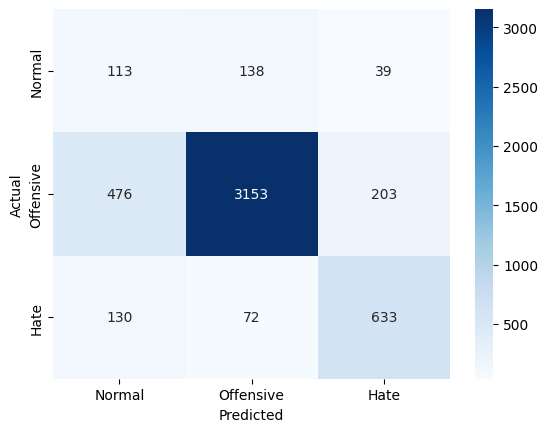

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize and pad sequence
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['tweet'])
X_seq = tokenizer.texts_to_sequences(df['tweet'])
X_pad = pad_sequences(X_seq, maxlen=100)

X_train_pad, X_test_pad, y_train_pad, y_test_pad = train_test_split(X_pad, y, test_size=0.2, random_state=42)
X_train_pad_resampled, y_train_pad_resampled = smote.fit_resample(X_train_pad, y_train_pad)

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(GlobalMaxPooling1D())
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(3, activation='softmax'))

# Compile the model
lstm_model.compile(optimizer=Adam(),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
lstm_history = lstm_model.fit(X_train_pad_resampled, y_train_pad_resampled, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the test set
lstm_y_pred = lstm_model.predict(X_test_pad)
lstm_y_pred_classes = lstm_y_pred.argmax(axis=1)

# Evaluate the LSTM model
lstm_accuracy = accuracy_score(y_test_pad, lstm_y_pred_classes)
lstm_precision = precision_score(y_test_pad, lstm_y_pred_classes, average='weighted')
lstm_recall = recall_score(y_test_pad, lstm_y_pred_classes, average='weighted')
lstm_f1 = f1_score(y_test_pad, lstm_y_pred_classes, average='weighted')
print(f'LSTM Accuracy: {lstm_accuracy}')
print(f'LSTM Precision: {lstm_precision}')
print(f'LSTM Recall: {lstm_recall}')
print(f'LSTM F1-Score: {lstm_f1}')
print(classification_report(y_test_pad, lstm_y_pred_classes, target_names=['Normal', 'Offensive', 'Hate']))
lstm_cm = confusion_matrix(y_test_pad, lstm_y_pred_classes)
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Offensive', 'Hate'], yticklabels=['Normal', 'Offensive', 'Hate'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
